In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import xgboost as xgb
from xgboost import plot_tree
from xgboost import plot_importance
from scipy import stats
#import keras_tuner as kt
from scipy.stats import norm 
import statistics 
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")
from matplotlib.patches import ConnectionPatch
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

C:\Users\anmit\AppData\Local\Temp\ipykernel_3204\1054028755.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load Dataset

In [2]:
df = pd.read_csv("diabetes_raw.csv")
df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0


In [3]:
import pandas as pd

# Assuming df is already defined and Main_df is a DataFrame created from df
Main_df = pd.DataFrame(df)

def describe(Main_df):
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    min_ = []
    max_ = []
    mean_ = []

    for item in Main_df.columns:
        variables.append(item)
        dtypes.append(Main_df[item].dtype)
        count.append(len(Main_df[item]))
        unique.append(len(Main_df[item].unique()))
        missing.append(Main_df[item].isna().sum())
        
        if Main_df[item].dtypes == 'float64' or Main_df[item].dtypes == 'int64':
            min_.append(Main_df[item].min())
            max_.append(Main_df[item].max())
            mean_.append(Main_df[item].mean())
        else:
            min_.append('Str')
            max_.append('Str')
            mean_.append('N/A')

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing,
        'Min': min_,
        'Max': max_,
        'Mean': mean_
    })    
        
    return output

Styles = [dict(selector = "caption",
               props = [("color", "darkslategray"), 
                        ("text-align", "center"),
                       ('font-size', '15pt')])]



In [4]:
desc_df = describe(Main_df)
desc_df



,variable,dtype,count,unique,missing value,Min,Max,Mean
0,id,int64,403,403,0,1000,41756,15978.310174
1,chol,float64,403,155,1,78.0,443.0,207.845771
2,stab.glu,int64,403,116,0,48,385,106.672457
3,hdl,float64,403,78,1,12.0,120.0,50.445274
4,ratio,float64,403,70,1,1.5,19.299999,4.521642
5,glyhb,float64,403,240,13,2.68,16.110001,5.589769
6,location,object,403,2,0,Str,Str,N/A
7,age,int64,403,68,0,19,92,46.851117
8,gender,object,403,2,0,Str,Str,N/A
9,height,float64,403,23,5,52.0,76.0,66.020101


In [5]:
df['outcome'] = (df['glyhb'] > 6).astype(int)
x = df.drop(['id', 'glyhb', 'outcome', 'location'], axis=1)  # Excluding non-predictive and target variables
y = df['outcome']

Preproccessing


In [6]:

numerical_cols = x.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = x.select_dtypes(include=['object']).columns

imputer_num = SimpleImputer(strategy='median')
x[numerical_cols] = imputer_num.fit_transform(x[numerical_cols])

imputer_cat = SimpleImputer(strategy='most_frequent')
x[categorical_cols] = imputer_cat.fit_transform(x[categorical_cols])

# Encode categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols:
    x[col] = label_encoder.fit_transform(x[col])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Scaling Normalising

In [7]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Scale only the numerical columns in the training set and apply the same transformation to the test set
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])


x_train_normal = pd.DataFrame()
x_test_normal = pd.DataFrame()

for col in X_train.columns:
    # Adding a small constant to avoid zero or negative values
    adjusted_train = X_train[col] + 1e-5  # Adjust as needed
    adjusted_test = X_test[col] + 1e-5  # Adjust as needed

    # Apply Box-Cox transformation
    x_train_normal[col], _ = stats.boxcox(adjusted_train)
    x_test_normal[col], _ = stats.boxcox(adjusted_test)




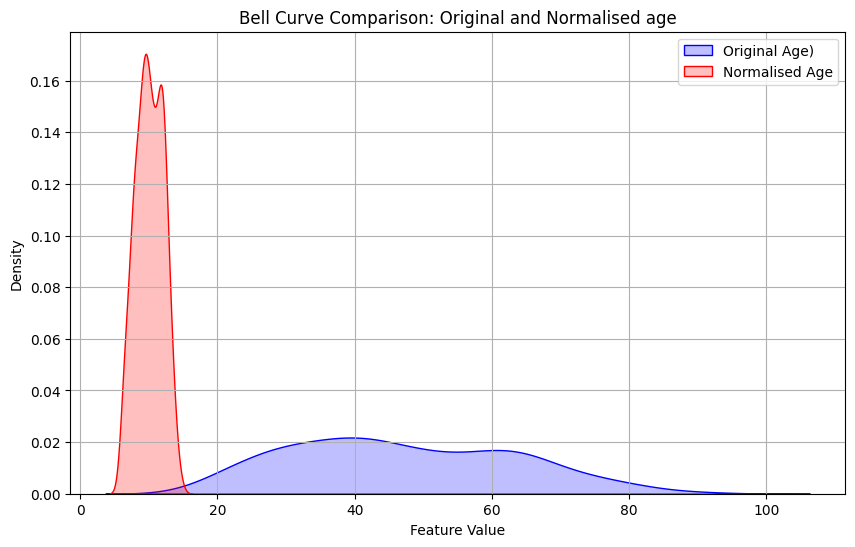

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train and X_train_scaled are already defined

# Select a specific column (e.g., the second column, index 1)
column_index = "age"
original_feature = X_train[column_index]
scaled_feature = x_train_normal[column_index]

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the distribution (bell curve) for the original data
sns.kdeplot(original_feature, label='Original Age)', color='blue', shade=True)

# Plot the distribution (bell curve) for the scaled data
sns.kdeplot(scaled_feature, label='Normalised Age', color='red', shade=True)

# Add titles and labels
plt.title('Bell Curve Comparison: Original and Normalised age')
plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


PCA

In [23]:
pca = PCA(n_components=7)  # For example, reduce to 7 components
x_test_pca = pca.fit_transform(X_test_scaled)
x_train_pca = pca.fit_transform(X_train_scaled)

# Explained variance can be used to understand the amount of information retained
print("Explained Variance: ", pca.explained_variance_ratio_)
print("Total Variance Explained: ", sum(pca.explained_variance_ratio_))

Explained Variance:  [0.23724223 0.16252451 0.1107832  0.09406836 0.07488795 0.07039036
 0.06078779]
Total Variance Explained:  0.8106843946496078


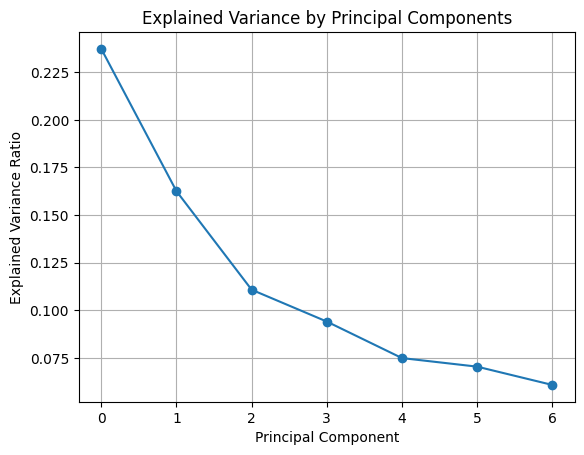

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Plot explained variance ratio
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


LDA

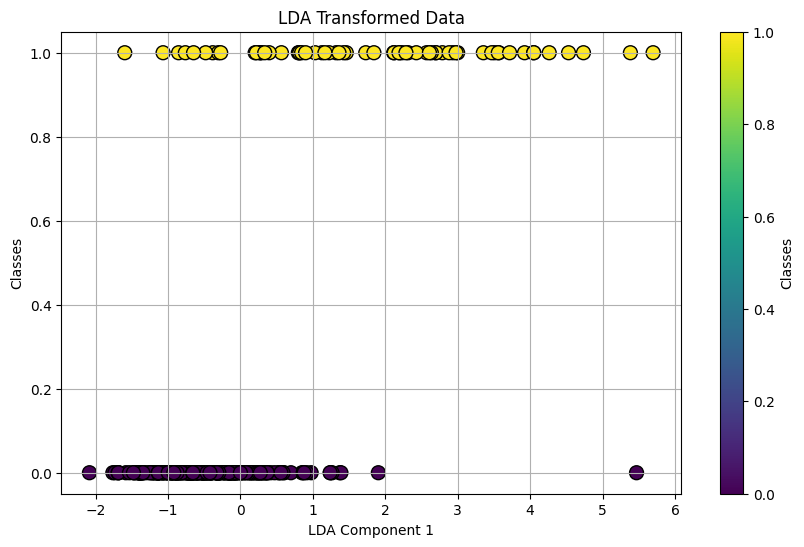

In [29]:
lda_preprocessing = LinearDiscriminantAnalysis(n_components=1)

# Fit LDA on the training data and transform it
X_train_lda = lda_preprocessing.fit_transform(X_train, y_train)
X_test_lda = lda_preprocessing.transform(X_test)

import matplotlib.pyplot as plt

# Assuming you have already applied LDA and obtained X_train_lda and y_train

# Plotting the LDA transformed data (1 component)
plt.figure(figsize=(10, 6))

# Scatter plot with color corresponding to the class labels (y_train)
plt.scatter(X_train_lda, y_train, c=y_train, cmap='viridis', edgecolor='k', s=100)

plt.title('LDA Transformed Data')
plt.xlabel('LDA Component 1')
plt.ylabel('Classes')
plt.grid(True)
plt.colorbar(label='Classes')  # Color bar to indicate class labels
plt.show()


Random Forest 


In [45]:
# Initialize RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Train and evaluate on raw data
clf.fit(X_train, y_train)
y_pred_rf = clf.predict(X_test)
accuracy_rf_raw = accuracy_score(y_test, y_pred_rf)
precision_rf_raw = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf_raw = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf_raw = f1_score(y_test, y_pred_rf, average='weighted')

# Train and evaluate on scaled data
clf.fit(X_train_scaled, y_train)
y_pred_rf_scaled = clf.predict(X_test_scaled)
accuracy_rf_scaled = accuracy_score(y_test, y_pred_rf_scaled)
precision_rf_scaled = precision_score(y_test, y_pred_rf_scaled, average='weighted')
recall_rf_scaled = recall_score(y_test, y_pred_rf_scaled, average='weighted')
f1_rf_scaled = f1_score(y_test, y_pred_rf_scaled, average='weighted')

# Train and evaluate on normalized data
clf.fit(x_train_normal, y_train)
y_pred_rf_normal = clf.predict(x_test_normal)
accuracy_rf_normal = accuracy_score(y_test, y_pred_rf_normal)
precision_rf_normal = precision_score(y_test, y_pred_rf_normal, average='weighted')
recall_rf_normal = recall_score(y_test, y_pred_rf_normal, average='weighted')
f1_rf_normal = f1_score(y_test, y_pred_rf_normal, average='weighted')

# Train and evaluate on PCA data
clf.fit(x_train_pca, y_train)
y_pred_rf_pca = clf.predict(x_test_pca)
accuracy_rf_pca = accuracy_score(y_test, y_pred_rf_pca)
precision_rf_pca = precision_score(y_test, y_pred_rf_pca, average='weighted')
recall_rf_pca = recall_score(y_test, y_pred_rf_pca, average='weighted')
f1_rf_pca = f1_score(y_test, y_pred_rf_pca, average='weighted')

# Train and evaluate on LDA data
clf.fit(X_train_lda, y_train)
y_pred_rf_lda = clf.predict(X_test_lda)
accuracy_rf_lda = accuracy_score(y_test, y_pred_rf_lda)
precision_rf_lda = precision_score(y_test, y_pred_rf_lda, average='weighted')
recall_rf_lda = recall_score(y_test, y_pred_rf_lda, average='weighted')
f1_rf_lda = f1_score(y_test, y_pred_rf_lda, average='weighted')

# Print results
print("Random Forest Accuracy:")
print(f"Accuracy (Raw Data): {accuracy_rf_raw}")
print(f"Accuracy (Scaled Data): {accuracy_rf_scaled}")
print(f"Accuracy (Normalized Data): {accuracy_rf_normal}")
print(f"Accuracy (PCA Data): {accuracy_rf_pca}")
print(f"Accuracy (LDA Data): {accuracy_rf_lda}")

print("\nRandom Forest Precision:")
print(f"Precision (Raw Data): {precision_rf_raw}")
print(f"Precision (Scaled Data): {precision_rf_scaled}")
print(f"Precision (Normalized Data): {precision_rf_normal}")
print(f"Precision (PCA Data): {precision_rf_pca}")
print(f"Precision (LDA Data): {precision_rf_lda}")

print("\nRandom Forest Recall:")
print(f"Recall (Raw Data): {recall_rf_raw}")
print(f"Recall (Scaled Data): {recall_rf_scaled}")
print(f"Recall (Normalized Data): {recall_rf_normal}")
print(f"Recall (PCA Data): {recall_rf_pca}")
print(f"Recall (LDA Data): {recall_rf_lda}")

print("\nRandom Forest F1 Score:")
print(f"F1 Score (Raw Data): {f1_rf_raw}")
print(f"F1 Score (Scaled Data): {f1_rf_scaled}")
print(f"F1 Score (Normalized Data): {f1_rf_normal}")
print(f"F1 Score (PCA Data): {f1_rf_pca}")
print(f"F1 Score (LDA Data): {f1_rf_lda}")



Random Forest Accuracy:
Accuracy (Raw Data): 0.8888888888888888
Accuracy (Scaled Data): 0.8888888888888888
Accuracy (Normalized Data): 0.7901234567901234
Accuracy (PCA Data): 0.8024691358024691
Accuracy (LDA Data): 0.8395061728395061

Random Forest Precision:
Precision (Raw Data): 0.9029733959311423
Precision (Scaled Data): 0.9029733959311423
Precision (Normalized Data): 0.7652418400135296
Precision (PCA Data): 0.7836076817558298
Precision (LDA Data): 0.8426128314106455

Random Forest Recall:
Recall (Raw Data): 0.8888888888888888
Recall (Scaled Data): 0.8888888888888888
Recall (Normalized Data): 0.7901234567901234
Recall (PCA Data): 0.8024691358024691
Recall (LDA Data): 0.8395061728395061

Random Forest F1 Score:
F1 Score (Raw Data): 0.8754069080747846
F1 Score (Scaled Data): 0.8754069080747846
F1 Score (Normalized Data): 0.7559213534522177
F1 Score (PCA Data): 0.7745663218300033
F1 Score (LDA Data): 0.8409113720766836


SVM 


In [44]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

svm = SVC()

# Train and evaluate on raw data
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm_raw = accuracy_score(y_test, y_pred_svm)
precision_svm_raw = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm_raw = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm_raw = f1_score(y_test, y_pred_svm, average='weighted')

# Train and evaluate on scaled data
svm.fit(X_train_scaled, y_train)
y_pred_svm_scaled = svm.predict(X_test_scaled)
accuracy_svm_scaled = accuracy_score(y_test, y_pred_svm_scaled)
precision_svm_scaled = precision_score(y_test, y_pred_svm_scaled, average='weighted')
recall_svm_scaled = recall_score(y_test, y_pred_svm_scaled, average='weighted')
f1_svm_scaled = f1_score(y_test, y_pred_svm_scaled, average='weighted')

# Train and evaluate on normalized data
svm.fit(x_train_normal, y_train)
y_pred_svm_normal = svm.predict(x_test_normal)
accuracy_svm_normal = accuracy_score(y_test, y_pred_svm_normal)
precision_svm_normal = precision_score(y_test, y_pred_svm_normal, average='weighted')
recall_svm_normal = recall_score(y_test, y_pred_svm_normal, average='weighted')
f1_svm_normal = f1_score(y_test, y_pred_svm_normal, average='weighted')

# Train and evaluate on PCA data
svm.fit(x_train_pca, y_train)
y_pred_svm_pca = svm.predict(x_test_pca)
accuracy_svm_pca = accuracy_score(y_test, y_pred_svm_pca)
precision_svm_pca = precision_score(y_test, y_pred_svm_pca, average='weighted')
recall_svm_pca = recall_score(y_test, y_pred_svm_pca, average='weighted')
f1_svm_pca = f1_score(y_test, y_pred_svm_pca, average='weighted')

# Train and evaluate on LDA data
svm.fit(X_train_lda, y_train)
y_pred_svm_lda = svm.predict(X_test_lda)
accuracy_svm_lda = accuracy_score(y_test, y_pred_svm_lda)
precision_svm_lda = precision_score(y_test, y_pred_svm_lda, average='weighted')
recall_svm_lda = recall_score(y_test, y_pred_svm_lda, average='weighted')
f1_svm_lda = f1_score(y_test, y_pred_svm_lda, average='weighted')

# Print results
print("SVM Accuracy:")
print(f"Accuracy (Raw Data): {accuracy_svm_raw}")
print(f"Accuracy (Scaled Data): {accuracy_svm_scaled}")
print(f"Accuracy (Normalized Data): {accuracy_svm_normal}")
print(f"Accuracy (PCA Data): {accuracy_svm_pca}")
print(f"Accuracy (LDA Data): {accuracy_svm_lda}")

print("\nSVM Precision:")
print(f"Precision (Raw Data): {precision_svm_raw}")
print(f"Precision (Scaled Data): {precision_svm_scaled}")
print(f"Precision (Normalized Data): {precision_svm_normal}")
print(f"Precision (PCA Data): {precision_svm_pca}")
print(f"Precision (LDA Data): {precision_svm_lda}")

print("\nSVM Recall:")
print(f"Recall (Raw Data): {recall_svm_raw}")
print(f"Recall (Scaled Data): {recall_svm_scaled}")
print(f"Recall (Normalized Data): {recall_svm_normal}")
print(f"Recall (PCA Data): {recall_svm_pca}")
print(f"Recall (LDA Data): {recall_svm_lda}")


print("\nSVM F1 Score:")
print(f"F1 Score (Raw Data): {f1_svm_raw}")
print(f"F1 Score (Scaled Data): {f1_svm_scaled}")
print(f"F1 Score (Normalized Data): {f1_svm_normal}")
print(f"F1 Score (PCA Data): {f1_svm_pca}")
print(f"F1 Score (LDA Data): {f1_svm_lda}")




SVM Accuracy:
Accuracy (Raw Data): 0.8765432098765432
Accuracy (Scaled Data): 0.8888888888888888
Accuracy (Normalized Data): 0.7654320987654321
Accuracy (PCA Data): 0.7654320987654321
Accuracy (LDA Data): 0.9012345679012346

SVM Precision:
Precision (Raw Data): 0.8936899862825788
Precision (Scaled Data): 0.9029733959311423
Precision (Normalized Data): 0.5858862978204541
Precision (PCA Data): 0.7194238683127572
Precision (LDA Data): 0.9125220458553791

SVM Recall:
Recall (Raw Data): 0.8765432098765432
Recall (Scaled Data): 0.8888888888888888
Recall (Normalized Data): 0.7654320987654321
Recall (PCA Data): 0.7654320987654321
Recall (LDA Data): 0.9012345679012346

SVM F1 Score:
F1 Score (Raw Data): 0.8591039511437522
F1 Score (Scaled Data): 0.8754069080747846
F1 Score (Normalized Data): 0.663731330397997
F1 Score (PCA Data): 0.7155735784446247
F1 Score (LDA Data): 0.89105873550318


Logistic Regression

In [46]:
# Initialize Logistic Regression
log_reg = LogisticRegression()

# Train and evaluate on raw data
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Train and evaluate on scaled data
log_reg.fit(X_train_scaled, y_train)
y_pred_lr_scaled = log_reg.predict(X_test_scaled)
accuracy_lr_scaled = accuracy_score(y_test, y_pred_lr_scaled)
precision_lr_scaled = precision_score(y_test, y_pred_lr_scaled, average='weighted')
recall_lr_scaled = recall_score(y_test, y_pred_lr_scaled, average='weighted')
f1_lr_scaled = f1_score(y_test, y_pred_lr_scaled, average='weighted')

# Train and evaluate on normalized data
log_reg.fit(x_train_normal, y_train)
y_pred_lr_normal = log_reg.predict(x_test_normal)
accuracy_lr_normal = accuracy_score(y_test, y_pred_lr_normal)
precision_lr_normal = precision_score(y_test, y_pred_lr_normal, average='weighted')
recall_lr_normal = recall_score(y_test, y_pred_lr_normal, average='weighted')
f1_lr_normal = f1_score(y_test, y_pred_lr_normal, average='weighted')

# Train and evaluate on PCA data
log_reg.fit(x_train_pca, y_train)
y_pred_lr_pca = log_reg.predict(x_test_pca)
accuracy_lr_pca = accuracy_score(y_test, y_pred_lr_pca)
precision_lr_pca = precision_score(y_test, y_pred_lr_pca, average='weighted')
recall_lr_pca = recall_score(y_test, y_pred_lr_pca, average='weighted')
f1_lr_pca = f1_score(y_test, y_pred_lr_pca, average='weighted')

# Train and evaluate on LDA data
log_reg.fit(X_train_lda, y_train)
y_pred_lr_lda = log_reg.predict(X_test_lda)
accuracy_lr_lda = accuracy_score(y_test, y_pred_lr_lda)
precision_lr_lda = precision_score(y_test, y_pred_lr_lda, average='weighted')
recall_lr_lda = recall_score(y_test, y_pred_lr_lda, average='weighted')
f1_lr_lda = f1_score(y_test, y_pred_lr_lda, average='weighted')

# Print results
print("Logistic Regression Accuracy:")
print(f"Accuracy (Raw Data): {accuracy_lr}")
print(f"Accuracy (Scaled Data): {accuracy_lr_scaled}")
print(f"Accuracy (Normalized Data): {accuracy_lr_normal}")
print(f"Accuracy (PCA Data): {accuracy_lr_pca}")
print(f"Accuracy (LDA Data): {accuracy_lr_lda}")

print("\nLogistic Regression Precision:")
print(f"Precision (Raw Data): {precision_lr}")
print(f"Precision (Scaled Data): {precision_lr_scaled}")
print(f"Precision (Normalized Data): {precision_lr_normal}")
print(f"Precision (PCA Data): {precision_lr_pca}")
print(f"Precision (LDA Data): {precision_lr_lda}")

print("\nLogistic Regression Recall:")
print(f"Recall (Raw Data): {recall_lr}")
print(f"Recall (Scaled Data): {recall_lr_scaled}")
print(f"Recall (Normalized Data): {recall_lr_normal}")
print(f"Recall (PCA Data): {recall_lr_pca}")
print(f"Recall (LDA Data): {recall_lr_lda}")

print("\nLogistic Regression F1 Score:")
print(f"F1 Score (Raw Data): {f1_lr}")
print(f"F1 Score (Scaled Data): {f1_lr_scaled}")
print(f"F1 Score (Normalized Data): {f1_lr_normal}")
print(f"F1 Score (PCA Data): {f1_lr_pca}")
print(f"F1 Score (LDA Data): {f1_lr_lda}")



Logistic Regression Accuracy:
Accuracy (Raw Data): 0.9012345679012346
Accuracy (Scaled Data): 0.9012345679012346
Accuracy (Normalized Data): 0.7654320987654321
Accuracy (PCA Data): 0.8024691358024691
Accuracy (LDA Data): 0.9012345679012346

Logistic Regression Precision:
Precision (Raw Data): 0.9125220458553791
Precision (Scaled Data): 0.9125220458553791
Precision (Normalized Data): 0.5858862978204541
Precision (PCA Data): 0.7836076817558298
Precision (LDA Data): 0.9125220458553791

Logistic Regression Recall:
Recall (Raw Data): 0.9012345679012346
Recall (Scaled Data): 0.9012345679012346
Recall (Normalized Data): 0.7654320987654321
Recall (PCA Data): 0.8024691358024691
Recall (LDA Data): 0.9012345679012346

Logistic Regression F1 Score:
F1 Score (Raw Data): 0.89105873550318
F1 Score (Scaled Data): 0.89105873550318
F1 Score (Normalized Data): 0.663731330397997
F1 Score (PCA Data): 0.7745663218300033
F1 Score (LDA Data): 0.89105873550318


XGBoost 

In [47]:

# Initialize XGBoost Classifier
xgb_clf = xgb.XGBClassifier()

# Train and evaluate on raw data
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

# Train and evaluate on scaled data
xgb_clf.fit(X_train_scaled, y_train)
y_pred_xgb_scaled = xgb_clf.predict(X_test_scaled)
accuracy_xgb_scaled = accuracy_score(y_test, y_pred_xgb_scaled)
precision_xgb_scaled = precision_score(y_test, y_pred_xgb_scaled, average='weighted')
recall_xgb_scaled = recall_score(y_test, y_pred_xgb_scaled, average='weighted')
f1_xgb_scaled = f1_score(y_test, y_pred_xgb_scaled, average='weighted')

# Train and evaluate on normalized data
xgb_clf.fit(x_train_normal, y_train)
y_pred_xgb_normal = xgb_clf.predict(x_test_normal)
accuracy_xgb_normal = accuracy_score(y_test, y_pred_xgb_normal)
precision_xgb_normal = precision_score(y_test, y_pred_xgb_normal, average='weighted')
recall_xgb_normal = recall_score(y_test, y_pred_xgb_normal, average='weighted')
f1_xgb_normal = f1_score(y_test, y_pred_xgb_normal, average='weighted')

# Train and evaluate on PCA data
xgb_clf.fit(x_train_pca, y_train)
y_pred_xgb_pca = xgb_clf.predict(x_test_pca)
accuracy_xgb_pca = accuracy_score(y_test, y_pred_xgb_pca)
precision_xgb_pca = precision_score(y_test, y_pred_xgb_pca, average='weighted')
recall_xgb_pca = recall_score(y_test, y_pred_xgb_pca, average='weighted')
f1_xgb_pca = f1_score(y_test, y_pred_xgb_pca, average='weighted')

# Train and evaluate on LDA data
xgb_clf.fit(X_train_lda, y_train)
y_pred_xgb_lda = xgb_clf.predict(X_test_lda)
accuracy_xgb_lda = accuracy_score(y_test, y_pred_xgb_lda)
precision_xgb_lda = precision_score(y_test, y_pred_xgb_lda, average='weighted')
recall_xgb_lda = recall_score(y_test, y_pred_xgb_lda, average='weighted')
f1_xgb_lda = f1_score(y_test, y_pred_xgb_lda, average='weighted')

# Print results
print("XGBoost Accuracy:")
print(f"Accuracy (Raw Data): {accuracy_xgb}")
print(f"Accuracy (Scaled Data): {accuracy_xgb_scaled}")
print(f"Accuracy (Normalized Data): {accuracy_xgb_normal}")
print(f"Accuracy (PCA Data): {accuracy_xgb_pca}")
print(f"Accuracy (LDA Data): {accuracy_xgb_lda}")

print("\nXGBoost Precision:")
print(f"Precision (Raw Data): {precision_xgb}")
print(f"Precision (Scaled Data): {precision_xgb_scaled}")
print(f"Precision (Normalized Data): {precision_xgb_normal}")
print(f"Precision (PCA Data): {precision_xgb_pca}")
print(f"Precision (LDA Data): {precision_xgb_lda}")

print("\nXGBoost Recall:")
print(f"Recall (Raw Data): {recall_xgb}")
print(f"Recall (Scaled Data): {recall_xgb_scaled}")
print(f"Recall (Normalized Data): {recall_xgb_normal}")
print(f"Recall (PCA Data): {recall_xgb_pca}")
print(f"Recall (LDA Data): {recall_xgb_lda}")

print("\nXGBoost F1 Score:")
print(f"F1 Score (Raw Data): {f1_xgb}")
print(f"F1 Score (Scaled Data): {f1_xgb_scaled}")
print(f"F1 Score (Normalized Data): {f1_xgb_normal}")
print(f"F1 Score (PCA Data): {f1_xgb_pca}")
print(f"F1 Score (LDA Data): {f1_xgb_lda}")


XGBoost Accuracy:
Accuracy (Raw Data): 0.9259259259259259
Accuracy (Scaled Data): 0.9259259259259259
Accuracy (Normalized Data): 0.7654320987654321
Accuracy (PCA Data): 0.7407407407407407
Accuracy (LDA Data): 0.8271604938271605

XGBoost Precision:
Precision (Raw Data): 0.9245642701525054
Precision (Scaled Data): 0.9245642701525054
Precision (Normalized Data): 0.5858862978204541
Precision (PCA Data): 0.7078636607622114
Precision (LDA Data): 0.817433595211373

XGBoost Recall:
Recall (Raw Data): 0.9259259259259259
Recall (Scaled Data): 0.9259259259259259
Recall (Normalized Data): 0.7654320987654321
Recall (PCA Data): 0.7407407407407407
Recall (LDA Data): 0.8271604938271605

XGBoost F1 Score:
F1 Score (Raw Data): 0.92445620223398
F1 Score (Scaled Data): 0.92445620223398
F1 Score (Normalized Data): 0.663731330397997
F1 Score (PCA Data): 0.7183963081525258
F1 Score (LDA Data): 0.8196940813362381


Naive Bayes 

In [48]:

# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Train and evaluate on raw data
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb, average='weighted')
recall_gnb = recall_score(y_test, y_pred_gnb, average='weighted')
f1_gnb = f1_score(y_test, y_pred_gnb, average='weighted')

# Train and evaluate on scaled data
gnb.fit(X_train_scaled, y_train)
y_pred_gnb_scaled = gnb.predict(X_test_scaled)
accuracy_gnb_scaled = accuracy_score(y_test, y_pred_gnb_scaled)
precision_gnb_scaled = precision_score(y_test, y_pred_gnb_scaled, average='weighted')
recall_gnb_scaled = recall_score(y_test, y_pred_gnb_scaled, average='weighted')
f1_gnb_scaled = f1_score(y_test, y_pred_gnb_scaled, average='weighted')

# Train and evaluate on normalized data
gnb.fit(x_train_normal, y_train)
y_pred_gnb_normal = gnb.predict(x_test_normal)
accuracy_gnb_normal = accuracy_score(y_test, y_pred_gnb_normal)
precision_gnb_normal = precision_score(y_test, y_pred_gnb_normal, average='weighted')
recall_gnb_normal = recall_score(y_test, y_pred_gnb_normal, average='weighted')
f1_gnb_normal = f1_score(y_test, y_pred_gnb_normal, average='weighted')

# Train and evaluate on PCA data
gnb.fit(x_train_pca, y_train)
y_pred_gnb_pca = gnb.predict(x_test_pca)
accuracy_gnb_pca = accuracy_score(y_test, y_pred_gnb_pca)
precision_gnb_pca = precision_score(y_test, y_pred_gnb_pca, average='weighted')
recall_gnb_pca = recall_score(y_test, y_pred_gnb_pca, average='weighted')
f1_gnb_pca = f1_score(y_test, y_pred_gnb_pca, average='weighted')

# Train and evaluate on LDA data
gnb.fit(X_train_lda, y_train)
y_pred_gnb_lda = gnb.predict(X_test_lda)
accuracy_gnb_lda = accuracy_score(y_test, y_pred_gnb_lda)
precision_gnb_lda = precision_score(y_test, y_pred_gnb_lda, average='weighted')
recall_gnb_lda = recall_score(y_test, y_pred_gnb_lda, average='weighted')
f1_gnb_lda = f1_score(y_test, y_pred_gnb_lda, average='weighted')

# Print results
print("Naive Bayes Accuracy:")
print(f"Accuracy (Raw Data): {accuracy_gnb}")
print(f"Accuracy (Scaled Data): {accuracy_gnb_scaled}")
print(f"Accuracy (Normalized Data): {accuracy_gnb_normal}")
print(f"Accuracy (PCA Data): {accuracy_gnb_pca}")
print(f"Accuracy (LDA Data): {accuracy_gnb_lda}")

print("\nNaive Bayes Precision:")
print(f"Precision (Raw Data): {precision_gnb}")
print(f"Precision (Scaled Data): {precision_gnb_scaled}")
print(f"Precision (Normalized Data): {precision_gnb_normal}")
print(f"Precision (PCA Data): {precision_gnb_pca}")
print(f"Precision (LDA Data): {precision_gnb_lda}")

print("\nNaive Bayes Recall:")
print(f"Recall (Raw Data): {recall_gnb}")
print(f"Recall (Scaled Data): {recall_gnb_scaled}")
print(f"Recall (Normalized Data): {recall_gnb_normal}")
print(f"Recall (PCA Data): {recall_gnb_pca}")
print(f"Recall (LDA Data): {recall_gnb_lda}")

print("\nNaive Bayes F1 Score:")
print(f"F1 Score (Raw Data): {f1_gnb}")
print(f"F1 Score (Scaled Data): {f1_gnb_scaled}")
print(f"F1 Score (Normalized Data): {f1_gnb_normal}")
print(f"F1 Score (PCA Data): {f1_gnb_pca}")
print(f"F1 Score (LDA Data): {f1_gnb_lda}")


Naive Bayes Accuracy:
Accuracy (Raw Data): 0.9135802469135802
Accuracy (Scaled Data): 0.9135802469135802
Accuracy (Normalized Data): 0.7654320987654321
Accuracy (PCA Data): 0.7777777777777778
Accuracy (LDA Data): 0.9012345679012346

Naive Bayes Precision:
Precision (Raw Data): 0.9146989918134196
Precision (Scaled Data): 0.9146989918134196
Precision (Normalized Data): 0.5858862978204541
Precision (PCA Data): 0.7443157443157442
Precision (LDA Data): 0.9125220458553791

Naive Bayes Recall:
Recall (Raw Data): 0.9135802469135802
Recall (Scaled Data): 0.9135802469135802
Recall (Normalized Data): 0.7654320987654321
Recall (PCA Data): 0.7777777777777778
Recall (LDA Data): 0.9012345679012346

Naive Bayes F1 Score:
F1 Score (Raw Data): 0.9087080973385883
F1 Score (Scaled Data): 0.9087080973385883
F1 Score (Normalized Data): 0.663731330397997
F1 Score (PCA Data): 0.736299648064354
F1 Score (LDA Data): 0.89105873550318


Neural Network done

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import precision_score, f1_score
import numpy as np

# Define the models
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

modelpca = Sequential()
modelpca.add(Dense(12, input_dim=x_train_pca.shape[1], activation='relu'))
modelpca.add(Dense(8, activation='relu'))
modelpca.add(Dense(1, activation='sigmoid'))

modellda = Sequential()
modellda.add(Dense(12, input_dim=X_train_lda.shape[1], activation='relu'))
modellda.add(Dense(8, activation='relu'))
modellda.add(Dense(1, activation='sigmoid'))

# Compile the models
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
modelpca.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
modellda.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Fit and evaluate the models
# Fit the model on raw data
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)
y_pred_nn_raw = (model.predict(X_test) > 0.5).astype(int)
accuracy_nn_raw = model.evaluate(X_test, y_test)
precision_nn_raw = precision_score(y_test, y_pred_nn_raw, average='weighted')
recall_nn_raw = recall_score(y_test, y_pred_nn_raw, average='weighted')
f1_nn_raw = f1_score(y_test, y_pred_nn_raw, average='weighted')

# Fit the model on scaled data
model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, verbose=0)
y_pred_nn_scaled = (model.predict(X_test_scaled) > 0.5).astype(int)
accuracy_nn_scaled = model.evaluate(X_test_scaled, y_test)
precision_nn_scaled = precision_score(y_test, y_pred_nn_scaled, average='weighted')
recall_nn_scaled = recall_score(y_test, y_pred_nn_scaled, average='weighted')
f1_nn_scaled = f1_score(y_test, y_pred_nn_scaled, average='weighted')

# Fit the model on normalized data
model.fit(x_train_normal, y_train, epochs=50, batch_size=10, verbose=0)
y_pred_nn_normal = (model.predict(x_test_normal) > 0.5).astype(int)
accuracy_nn_normal = model.evaluate(x_test_normal, y_test)
precision_nn_normal = precision_score(y_test, y_pred_nn_normal, average='weighted')
recall_nn_normal = recall_score(y_test, y_pred_nn_normal, average='weighted')
f1_nn_normal = f1_score(y_test, y_pred_nn_normal, average='weighted')

# Fit the model on PCA data
modelpca.fit(x_train_pca, y_train, epochs=50, batch_size=10, verbose=0)
y_pred_nn_pca = (modelpca.predict(x_test_pca) > 0.5).astype(int)
accuracy_nn_pca = modelpca.evaluate(x_test_pca, y_test)
precision_nn_pca = precision_score(y_test, y_pred_nn_pca, average='weighted')
recall_nn_pca = recall_score(y_test, y_pred_nn_pca, average='weighted')
f1_nn_pca = f1_score(y_test, y_pred_nn_pca, average='weighted')

# Fit the model on LDA data
modellda.fit(X_train_lda, y_train, epochs=50, batch_size=10, verbose=0)
y_pred_nn_lda = (modellda.predict(X_test_lda) > 0.5).astype(int)
accuracy_nn_lda = modellda.evaluate(X_test_lda, y_test)
precision_nn_lda = precision_score(y_test, y_pred_nn_lda, average='weighted')
recall_nn_lda = recall_score(y_test, y_pred_nn_lda, average='weighted')
f1_nn_lda = f1_score(y_test, y_pred_nn_lda, average='weighted')

# Print results
print("Neural Network Accuracy:")
print(f"Accuracy (Raw Data): {accuracy_nn_raw[1]}")
print(f"Accuracy (Scaled Data): {accuracy_nn_scaled[1]}")
print(f"Accuracy (Normalized Data): {accuracy_nn_normal[1]}")
print(f"Accuracy (PCA Data): {accuracy_nn_pca[1]}")
print(f"Accuracy (LDA Data): {accuracy_nn_lda[1]}")

print("\nNeural Network Precision:")
print(f"Precision (Raw Data): {precision_nn_raw}")
print(f"Precision (Scaled Data): {precision_nn_scaled}")
print(f"Precision (Normalized Data): {precision_nn_normal}")
print(f"Precision (PCA Data): {precision_nn_pca}")
print(f"Precision (LDA Data): {precision_nn_lda}")

print("\nNeural Network Recall:")
print(f"Recall (Raw Data): {recall_nn_raw}")
print(f"Recall (Scaled Data): {recall_nn_scaled}")
print(f"Recall (Normalized Data): {recall_nn_normal}")
print(f"Recall (PCA Data): {recall_nn_pca}")
print(f"Recall (LDA Data): {recall_nn_lda}")

print("\nNeural Network F1 Score:")
print(f"F1 Score (Raw Data): {f1_nn_raw}")
print(f"F1 Score (Scaled Data): {f1_nn_scaled}")
print(f"F1 Score (Normalized Data): {f1_nn_normal}")
print(f"F1 Score (PCA Data): {f1_nn_pca}")
print(f"F1 Score (LDA Data): {f1_nn_lda}")


3/3 [==============================] - 0s 3ms/step - loss: 0.2533 - accuracy: 0.8889
Neural Network Accuracy:
Accuracy (Raw Data): 0.7530864477157593
Accuracy (Scaled Data): 0.8888888955116272
Accuracy (Normalized Data): 0.2469135820865631
Accuracy (PCA Data): 0.8024691343307495
Accuracy (LDA Data): 0.8888888955116272

Neural Network Precision:
Precision (Raw Data): 0.8621500288166954
Precision (Scaled Data): 0.8917069243156199
Precision (Normalized Data): 0.5644191199746755
Precision (PCA Data): 0.7836076817558298
Precision (LDA Data): 0.8865197820421701

Neural Network Recall:
Recall (Raw Data): 0.7530864197530864
Recall (Scaled Data): 0.8888888888888888
Recall (Normalized Data): 0.24691358024691357
Recall (PCA Data): 0.8024691358024691
Recall (LDA Data): 0.8888888888888888

Neural Network F1 Score:
F1 Score (Raw Data): 0.7718045988486241
F1 Score (Scaled Data): 0.8793127034939398
F1 Score (Normalized Data): 0.13415964206342212
F1 Score (PCA Data): 0.7745663218300033
F1 Score (LDA Da

Printing accuracies

Text(0.5, 1.0, 'Accuracy Heatmap')

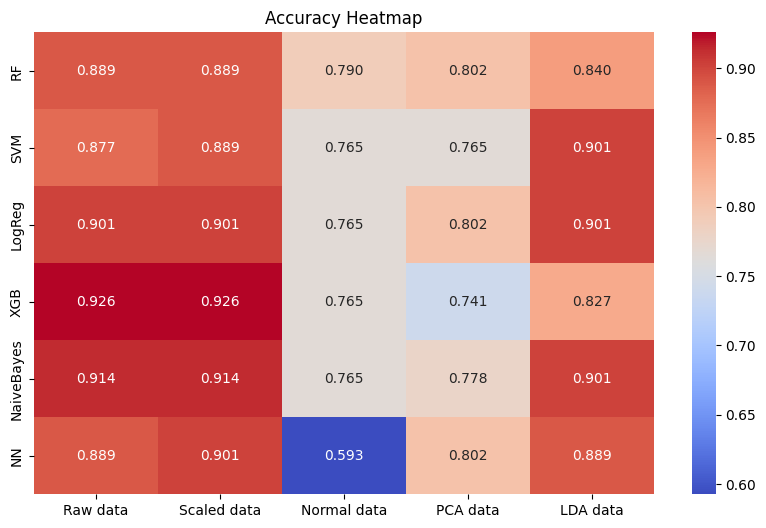

In [38]:
accuracies = {
    "Raw data": [accuracy_rf_raw, accuracy_svm_raw, accuracy_lr, accuracy_xgb, accuracy_gnb, accuracy_nn_raw[1]] ,
    "Scaled data": [accuracy_rf_scaled, accuracy_svm_scaled, accuracy_lr_scaled, accuracy_xgb_scaled, accuracy_gnb_scaled, accuracy_nn_scaled[1]],
    "Normal data": [accuracy_rf_normal, accuracy_svm_normal, accuracy_lr_normal, accuracy_xgb_normal, accuracy_gnb_normal, accuracy_nn_normal[1]],
    "PCA data": [accuracy_rf_pca, accuracy_svm_pca, accuracy_lr_pca, accuracy_xgb_pca, accuracy_gnb_pca, accuracy_nn_pca[1]],
    "LDA data": [accuracy_rf_lda, accuracy_svm_lda, accuracy_lr_lda, accuracy_xgb_lda, accuracy_gnb_lda, accuracy_nn_lda[1]]
}

models = ['RF', 'SVM', 'LogReg', 'XGB', 'NaiveBayes', 'NN']

# Creating a DataFrame
accuracies_df = pd.DataFrame(accuracies, index=models)

# Creating the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(accuracies_df, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Accuracy Heatmap')

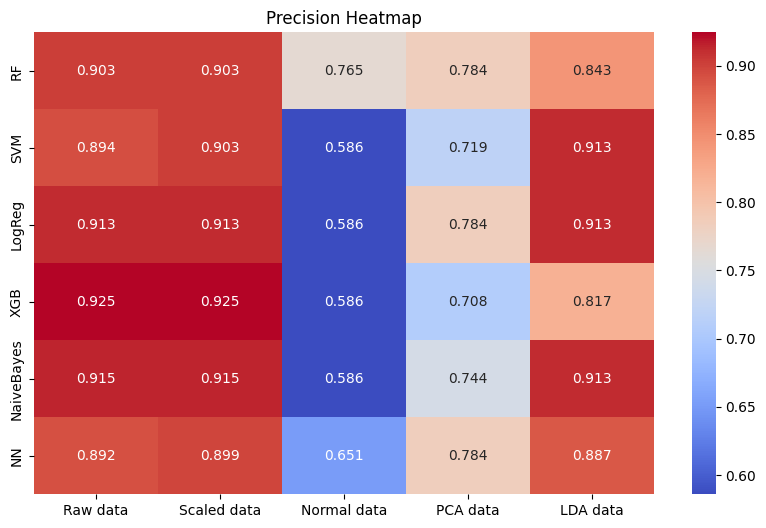

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define precision scores
precisions = {
    "Raw data": [precision_rf_raw, precision_svm_raw, precision_lr, precision_xgb, precision_gnb, precision_nn_raw],
    "Scaled data": [precision_rf_scaled, precision_svm_scaled, precision_lr_scaled, precision_xgb_scaled, precision_gnb_scaled, precision_nn_scaled],
    "Normal data": [precision_rf_normal, precision_svm_normal, precision_lr_normal, precision_xgb_normal, precision_gnb_normal, precision_nn_normal],
    "PCA data": [precision_rf_pca, precision_svm_pca, precision_lr_pca, precision_xgb_pca, precision_gnb_pca, precision_nn_pca],
    "LDA data": [precision_rf_lda, precision_svm_lda, precision_lr_lda, precision_xgb_lda, precision_gnb_lda, precision_nn_lda]
}

# Creating a DataFrame for precision
precisions_df = pd.DataFrame(precisions, index=models)

# Creating the precision heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(precisions_df, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Precision Heatmap')
plt.show()


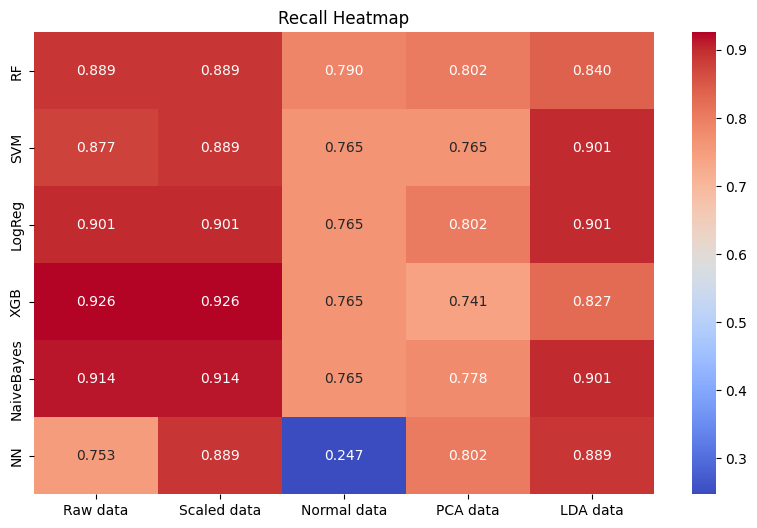

In [50]:
# Define precision scores
recalls = {
    "Raw data": [recall_rf_raw, recall_svm_raw, recall_lr, recall_xgb, recall_gnb, recall_nn_raw],
    "Scaled data": [recall_rf_scaled, recall_svm_scaled, recall_lr_scaled, recall_xgb_scaled, recall_gnb_scaled, recall_nn_scaled],
    "Normal data": [recall_rf_normal, recall_svm_normal, recall_lr_normal, recall_xgb_normal, recall_gnb_normal, recall_nn_normal],
    "PCA data": [recall_rf_pca, recall_svm_pca, recall_lr_pca, recall_xgb_pca, recall_gnb_pca, recall_nn_pca],
    "LDA data": [recall_rf_lda, recall_svm_lda, recall_lr_lda, recall_xgb_lda, recall_gnb_lda, recall_nn_lda]
}

# Creating a DataFrame for precision
precisions_df = pd.DataFrame(recalls, index=models)

# Creating the precision heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(precisions_df, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Recall Heatmap')
plt.show()

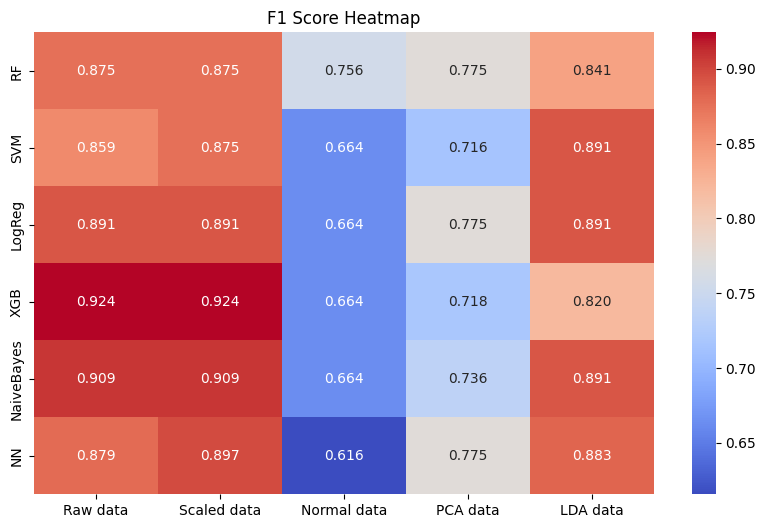

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define F1 scores
f1_scores = {
    "Raw data": [f1_rf_raw, f1_svm_raw, f1_lr, f1_xgb, f1_gnb, f1_nn_raw],
    "Scaled data": [f1_rf_scaled, f1_svm_scaled, f1_lr_scaled, f1_xgb_scaled, f1_gnb_scaled, f1_nn_scaled],
    "Normal data": [f1_rf_normal, f1_svm_normal, f1_lr_normal, f1_xgb_normal, f1_gnb_normal, f1_nn_normal],
    "PCA data": [f1_rf_pca, f1_svm_pca, f1_lr_pca, f1_xgb_pca, f1_gnb_pca, f1_nn_pca],
    "LDA data": [f1_rf_lda, f1_svm_lda, f1_lr_lda, f1_xgb_lda, f1_gnb_lda, f1_nn_lda]
}

# Creating a DataFrame for F1 scores
f1_scores_df = pd.DataFrame(f1_scores, index=models)

# Creating the F1 score heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(f1_scores_df, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('F1 Score Heatmap')
plt.show()


Final XGBoost model (scaled)

In [41]:
xgb_clf_scaled = xgb.XGBClassifier()

#train on scaled data
xgb_clf_scaled.fit(X_train_scaled, y_train)
y_pred_xgb_scaled2 = xgb_clf_scaled.predict(X_test_scaled)
accuracy_xgb_scaled2 = accuracy_score(y_test, y_pred_xgb_scaled2)

xgb_clf_scaled.save_model('model.bst')

X_train_scaled.to_csv('X_train_scaled.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test_scaled.to_csv('X_test_scaled.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

Grid Search XGB


In [19]:
def perform_grid_search_xgboost(X_train, y_train, param_grid=None):
    xgb_clf = xgb.XGBClassifier()
    
    if param_grid is None:
        param_grid = {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 4, 5],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    
    grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}")
    
    return best_model

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined
best_xgb_model = perform_grid_search_xgboost(X_train_scaled, y_train)

# Evaluate the model
y_pred_xgb_scaled2 = best_xgb_model.predict(X_test_scaled)
accuracy_xgb_scaled2 = accuracy_score(y_test, y_pred_xgb_scaled2)
print(f"Accuracy of the best XGBoost model: {accuracy_xgb_scaled2}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}
Accuracy of the best XGBoost model: 0.9135802469135802


SHAP Beeswarm


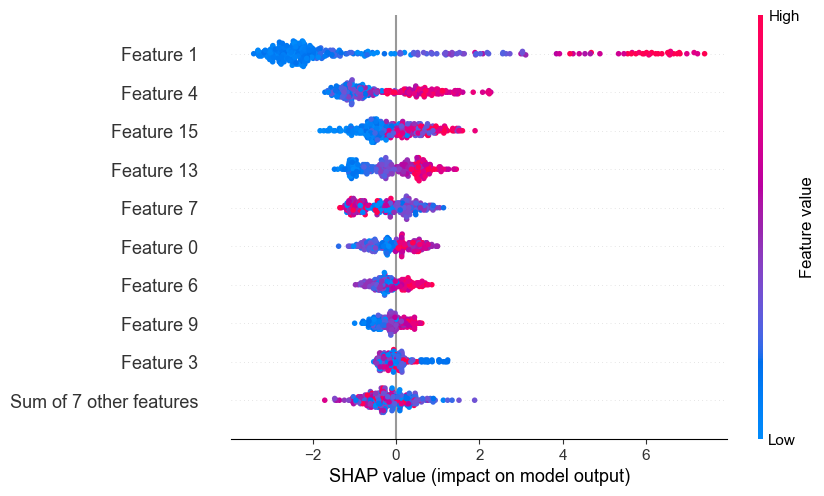

In [65]:
import shap
pred = xgb_clf_scaled.predict(X_train_scaled, output_margin=True)
# Create a TreeExplainer object
Xd = xgb.DMatrix(X_train_scaled,label=y_train)
Xdt = xgb.DMatrix(X_test_scaled,label=y_test)
explainer = shap.TreeExplainer(xgb_clf_scaled)
explanation = explainer(Xd)

shap_values = explanation.values
# make sure the SHAP values add up to marginal predictions
np.abs(shap_values.sum(axis=1) + explanation.base_values - pred).max()


shap.plots.beeswarm(explanation)


In [59]:
print(X_train_scaled.columns)

Index(['chol', 'stab.glu', 'hdl', 'ratio', 'age', 'gender', 'height', 'weight',
       'frame', 'bp.1s', 'bp.1d', 'bp.2s', 'bp.2d', 'waist', 'hip',
       'time.ppn'],
      dtype='object')


In [63]:

feature_names = ["chol", "stab.glu", "hdl", "ratio","age","gender", "height", "weight","frame", "bp.1s", "bp.1d",  "bp.2s", "bp.2d","waist", "hip","time.ppn"]

print(feature_names[1])
print(feature_names[4])
print(feature_names[15])
print(feature_names[13])
print(feature_names[7])
print(feature_names[0])
print(feature_names[6])
print(feature_names[9])
print(feature_names[3])



stab.glu
age
time.ppn
waist
weight
chol
height
bp.1s
ratio
